# Проект «Аналитика в авиакомпании»

В рамках данного проекта необходимо для российской авиакомпании «F9», выполняющей внутренние пассажирские авиаперевозки, изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали, понять предпочтения пользователей, покупающих билеты на те или иные направления.

В распоряжении имеется база данных об авиаперевозках:  информация об аэропортах, о самолётах, билетах, рейсах, фестивалях.

Исследование будем проводить в несколько шагов:
- Поработаем с базой данных в тренажере Практикума;
- Обработаем получившиеся результаты в Python:
 - Импортируем файлы;
 - Изучим данные в них;
 - Проверим типы данных на корректность;
 - Выберем топ-10 городов по количеству рейсов;
 - Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
 - Сделаем выводы по каждому из графиков, поясним результат. 
- Напишем общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла и изучение общей информации</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Построим-графики:-модели-самолетов-и-количество-рейсов,-города-и-количество-рейсов,-топ-10-городов-и-количество-рейсов" data-toc-modified-id="Построим-графики:-модели-самолетов-и-количество-рейсов,-города-и-количество-рейсов,-топ-10-городов-и-количество-рейсов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Открытие файла и изучение общей информации

In [1]:
#импортируем библиотеку pandas
import pandas as pd

#для создания графиков и гистограмм импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

#импортируем библиотеку warnings, чтобы скрыть возникающие предупреждения
import warnings
warnings.filterwarnings('ignore')

In [4]:
#получим общую информацию о таблицах
for item, name in [(model, 'model'), (city, 'city')]:
    print('Первые пять строк таблицы', name, ':')
    display(item.head())
    
    print()
    
    print('Общая информация о таблице', name, ':')
    item.info()
    print()

Первые пять строк таблицы model :


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300



Общая информация о таблице model :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

Первые пять строк таблицы city :


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613



Общая информация о таблице city :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB



In [5]:
#посчитаем количество дубликатов в таблице с информацией о модели самолета и количестве рейсов для каждой модели
print('Количество дубликатов в таблице с информацией о модели самолета и количестве рейсов для каждой модели:')
print(model.duplicated().sum()) 

Количество дубликатов в таблице с информацией о модели самолета и количестве рейсов для каждой модели:
0


In [6]:
#посчитаем количество дубликатов в таблице с информацией о городах и среднем количестве рейсов, прибывающих в город
print('Количество дубликатов в таблице с информацией о городах и среднем количестве рейсов, прибывающих в город:')
print(city.duplicated().sum())

Количество дубликатов в таблице с информацией о городах и среднем количестве рейсов, прибывающих в город:
0


## Вывод

На данном шаге откроем файлы, в которых содержатся результаты запросов из предыдущих заданий в Практикуме, и изучим общую информацию по каждой таблице.

- Таблица model - информация о модели самолета и количестве рейсов для каждой модели
 - Столбцы таблицы model:
   - model — модель самолета
   - flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года

- Таблица city - информация о городах и среднем количестве рейсов, прибывающих в город
 - Столбцы таблицы city:
   - city — город
   - average_flights — среднее количестве рейсов, прибывающих в город за день в августе 2018 года
   
В соответсвии с полученной общей информацией в таблицах  'model', 'city' пропущенные значения и дубликаты отсутствуют. Типы данные указаны корректно, менять не будем.

## Топ-10 городов по количеству рейсов

In [7]:
#выберем топ-10 городов по кличеству рейсов
city.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## Вывод

На данном шаге выберем топ-10 городов по количеству рейсов. На первом месте, что ожидаемо, Москва, среднее количестве рейсов, прибывающих в Москву за день в августе 2018 года составляет 129.7. 

На 10 месте Ульяновск, среднее количестве рейсов, прибывающих в Ульяновск за день в августе 2018 года составляет 9.5.

##  Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

### Модели самолетов и количество рейсов

In [8]:
#отсортируем модели по кличеству рейсов
model.sort_values(by = 'flights_amount', ascending = False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


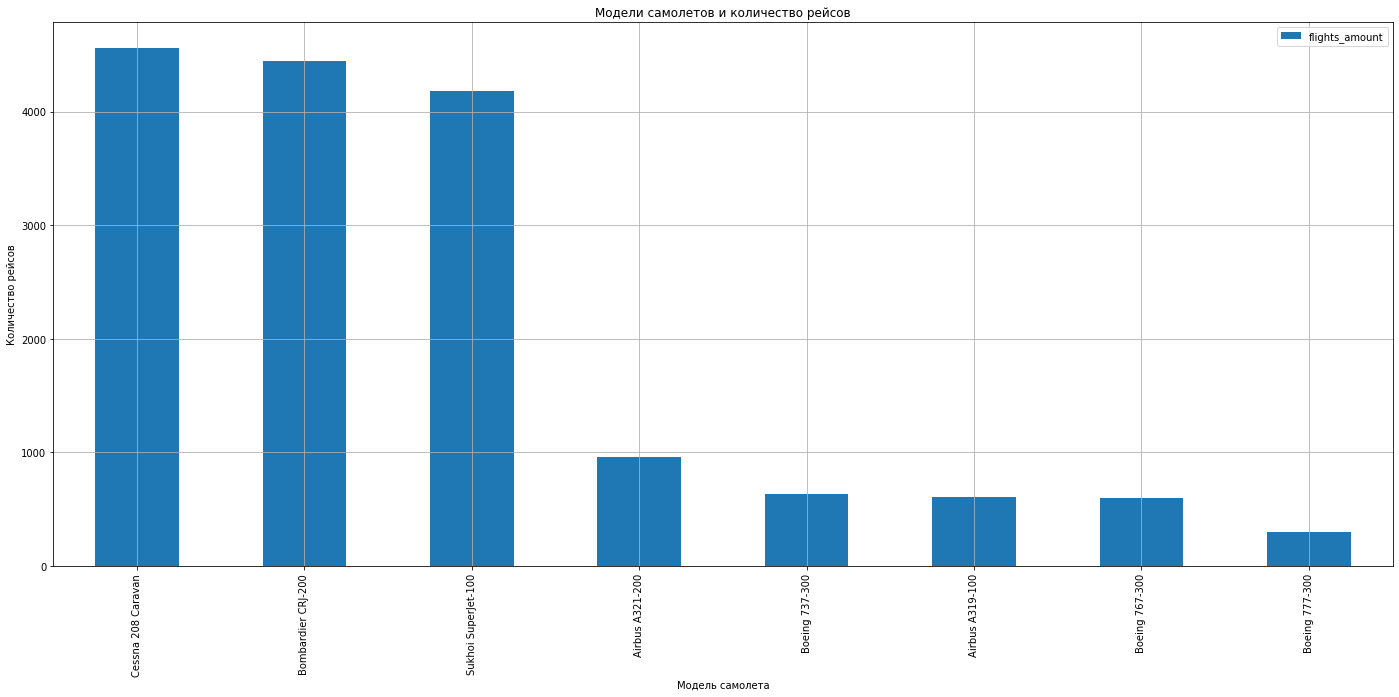

In [9]:
#построим график количества рейсов для разных моделей самолетов
model.pivot_table(index ='model', values = 'flights_amount').sort_values(by = 'flights_amount', ascending = False).plot(kind = 'bar', grid = True, figsize = (24,10),title='Модели самолетов и количество рейсов')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.show()

### Вывод

На данном шаге рассмотрим модели самолетов и количество рейсов для каждой модели. 

На первом месте по количеству рейсов модель самолета Cessna 208 Caravan, количество рейсов составляет 4557. На втором месте Bombardier CRJ-200, количество рейсов составляет 4446.
И Cessna 208 Caravan, и Bombardier CRJ-200 небольшие самолёты. Базовая модель Cessna 208 Caravan перевозит девять пассажиров, Bombardier CRJ-200 - пятьдесят. 

Минимальное количество рейсов у модели самолетов Boeing 777-300 и составляет 300. Boeing 777-300 вмещает от 305 до 550 пассажиров.

Чтобы перевезти большее количество пассажиров на Cessna 208 Caravan, нужно сделать больше рейсов, этим объясняется такое значительное количество рейсов. Плюс такой самолёт будет обходится дешевле в техническом обслуживании.  

###  Города и количество рейсов

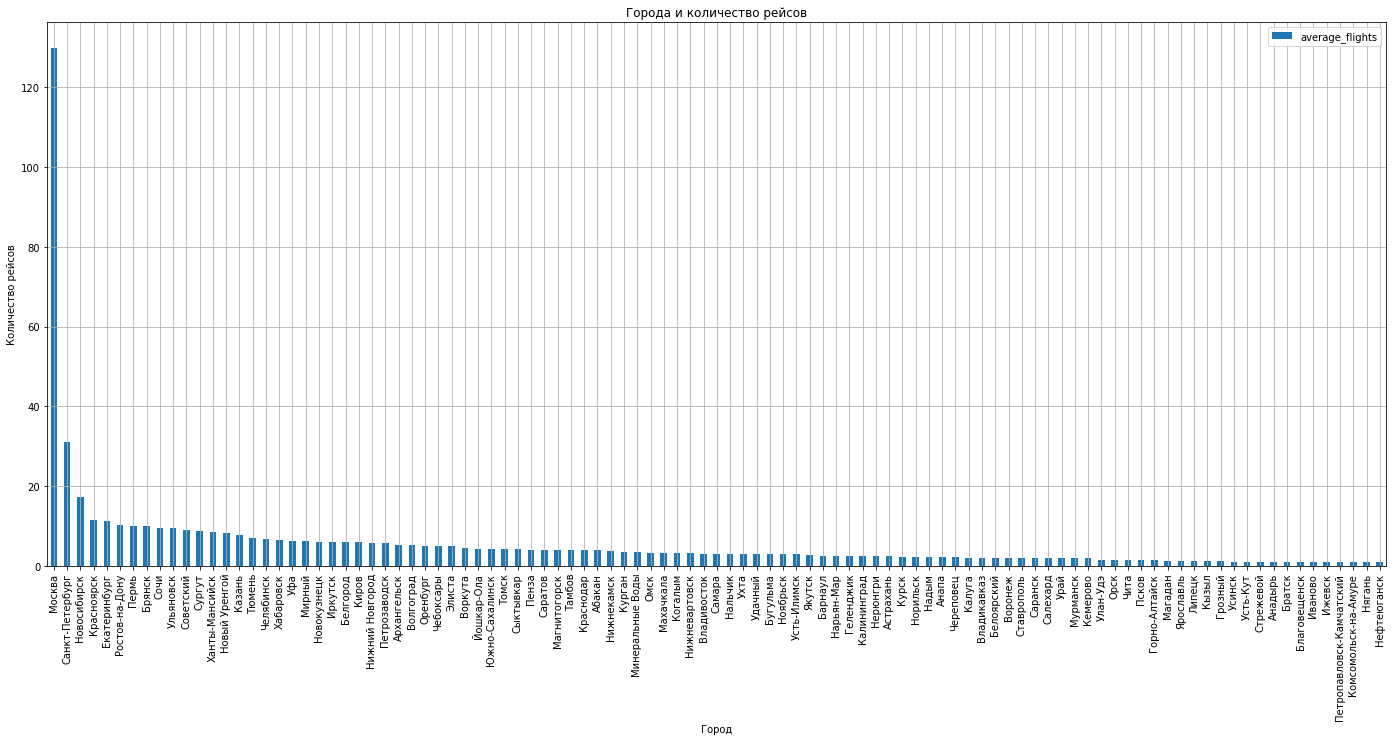

In [10]:
#построим график количества рейсов для разных городов
city.pivot_table(index ='city', values = 'average_flights').sort_values(by = 'average_flights', ascending = False).plot(kind = 'bar', grid = True, figsize = (24,10),title='Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

### Вывод

На данном шаге построим график количества рейсов для каждого города. График получается очень нагруженный из-за количества городов, на первом месте также Москва, а на последнем Нефтеюганск. Также в конце списка Ижевск, Петропавловск-Камчатский, Комсомольск-на-Амуре, Нягань. В Нефтеюганске количество жителей 125 тыс.чел., в Нягани - 58 тыс.чел., в Комсомольскена-Амуре - 244 тыс.чел, но количество рейсов минимальное. А в Новом Уренгое, например, количество жителей 118 тыс.чел., но город в первой двадцатке по количеству рейсов. То есть сказать, что количество рейсов снижается в зависимости от снижения количества населения не получается. Количество рейсов скорее может зависеть от крупных предприятий, которые находятся в городе. Но эта гипотеза не работает для Ижевска, например. 

###  Топ-10 городов и количество рейсов

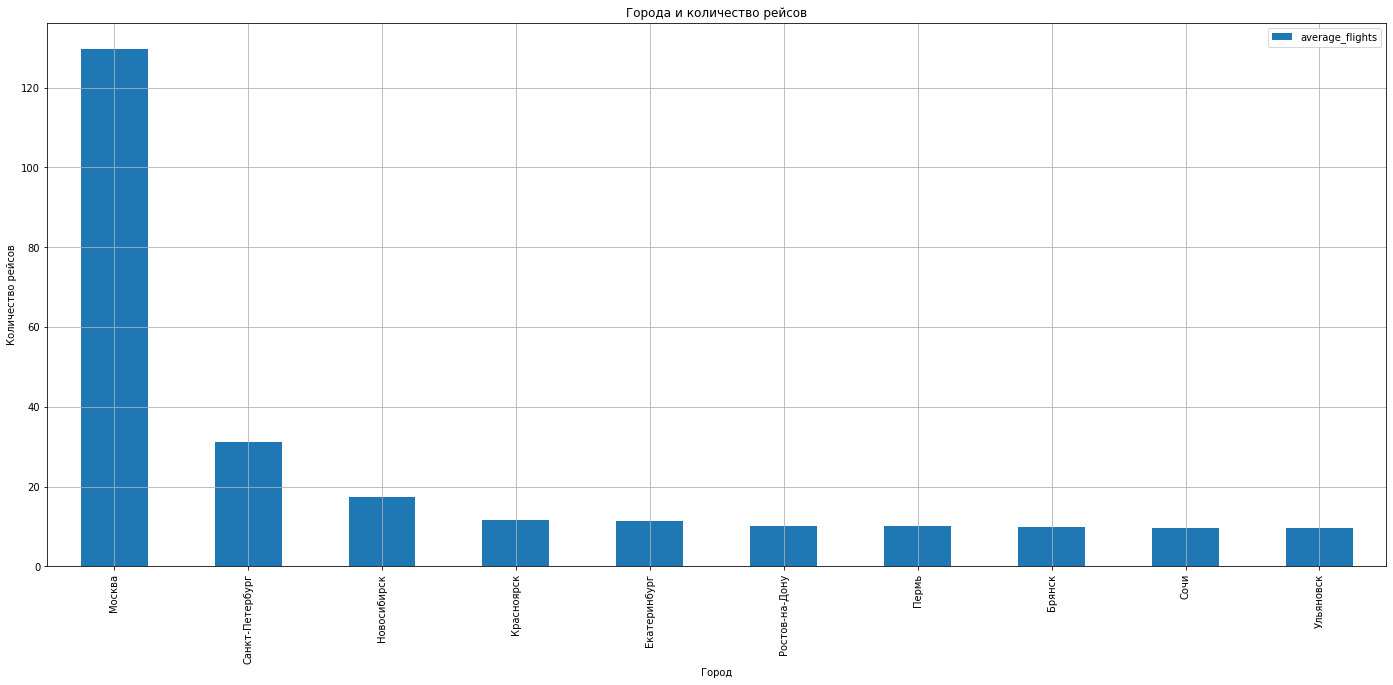

In [11]:
#построим график количества рейсов для топ-10
city.pivot_table(index ='city', values = 'average_flights').sort_values(by = 'average_flights', ascending = False).head(10).plot(kind = 'bar', grid = True, figsize = (24,10),title='Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

### Вывод

На данном шаге детализируем предыдущий график и построим график количества рейсов для топ-10 городов. На графике наглядно видно, что первые три места значительно отличаются от остальных, а начиная с Красноярска количество рейсов для разных городов примерно одинаково.

## Общий вывод

В рамках данного проекта необходимо было проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали, понять предпочтения пользователей, покупающих билеты на те или иные направления.


Исследование проводили в несколько шагов:
- Поработали с базой данных в тренажере Практикума;
- Обработали получившиеся результаты в Python:
 - Импортировали файлы;
 - Изучили данные в них;
 - Проверили типы данных на корректность;
 - Выбрали топ-10 городов по количеству рейсов;
 - Построили графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
 - Сделали выводы по каждому из графиков, пояснили результат. 

На первом месте по количеству рейсов, что ожидаемо, Москва, среднее количестве рейсов, прибывающих в Москву за день в августе 2018 года составляет 129.7. На 10 месте Ульяновск, среднее количестве рейсов, прибывающих в Ульяновск за день в августе 2018 года составляет 9.5.


Далее рассмотрели модели самолетов и количество рейсов для каждой модели. 
На первом месте по количеству рейсов модель самолета Cessna 208 Caravan, количество рейсов составляет 4557. На втором месте Bombardier CRJ-200, количество рейсов составляет 4446.
И Cessna 208 Caravan, и Bombardier CRJ-200 небольшие самолёты. Базовая модель Cessna 208 Caravan перевозит девять пассажиров, Bombardier CRJ-200 - пятьдесят. 
Минимальное количество рейсов у модели самолетов Boeing 777-300 и составляет 300. Boeing 777-300 вмещает от 305 до 550 пассажиров.
Чтобы перевезти большее количество пассажиров на Cessna 208 Caravan, нужно сделать больше рейсов, этим объясняется такое значительное количество рейсов. Плюс такой самолёт будет обходится дешевле в техническом обслуживании.  


Далее построили график количества рейсов для каждого города. График получается очень нагруженный из-за количества городов, на первом месте также Москва, а на последнем Нефтеюганск. Также в конце списка Ижевск, Петропавловск-Камчатский, Комсомольск-на-Амуре, Нягань. В Нефтеюганске количество жителей 125 тыс.чел., в Нягани - 58 тыс.чел., в Комсомольскена-Амуре - 244 тыс.чел, но количество рейсов минимальное. А в Новом Уренгое, например, количество жителей 118 тыс.чел., но город в первой двадцатке по количеству рейсов. То есть сказать, что количество рейсов снижается в зависимости от снижения количества населения не получается. Количество рейсов скорее может зависеть от крупных предприятий, которые находятся в городе. Но эта гипотеза не работает для Ижевска, например. 


В завершении детализировали предыдущий график и построили график количества рейсов для топ-10 городов. На графике наглядно видно, что первые три места значительно отличаются от остальных, а начиная с Красноярска количество рейсов для разных городов примерно одинаково.